#Training of a SOM

For this we use

In [1]:
import numpy as np
from astropy.table import Table
import os

In [2]:
path='./'

data='COSMOS2020_Classic_Euclid_processed.fits' #this is the fits you created in the data preparation

cat = Table.read(os.path.join(path,data))

cat

ID,RA,DEC,photoz,lp_type,lp_zp_2,lp_zq,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,CFHT_u_FLUX,CFHT_u_FLUXERR,HSC_r_FLUX,HSC_r_FLUXERR,HSC_i_FLUX,HSC_i_FLUXERR,HSC_g_FLUX,HSC_g_FLUXERR,HSC_z_FLUX,HSC_z_FLUXERR,HSC_y_FLUX,HSC_y_FLUXERR,UVISTA_Y_FLUX,UVISTA_Y_FLUXERR,UVISTA_J_FLUX,UVISTA_J_FLUXERR,UVISTA_H_FLUX,UVISTA_H_FLUXERR,UVISTA_Ks_FLUX,UVISTA_Ks_FLUXERR,SC_zp_FLUX,SC_zp_FLUXERR,CFHT_u_MAG,HSC_r_MAG,HSC_i_MAG,HSC_g_MAG,HSC_z_MAG,HSC_y_MAG,UVISTA_Y_MAG,UVISTA_J_MAG,UVISTA_H_MAG,UVISTA_Ks_MAG,SC_zp_MAG
,deg,deg,,,,,,yr,,,mag,mag,mag,log(solMass),log(solMass),log(solMass),log(solMass),log(solMass/yr),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),,,,,,,,,,,
int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
201293,150.7533320576763,1.6033332639541444,1.2724,0,1.32,0.4,5,508800000.0,0.2,1,-16.42532,-17.97332,-18.11549,8.4021,7.98959,8.79633,8.27906,-0.19806,5.6148235e-31,1.3774641e-31,3.3902223e-31,1.598043e-31,5.356332e-31,1.9956243e-31,2.7280824e-31,1.1299886e-31,1.3106568e-30,3.188331e-31,4.929103e-31,7.011757e-31,-8.483742e-30,1.0735587e-29,1.2107488e-29,5.1990588e-30,1.0577966e-30,5.7135518e-30,-2.4155805e-30,3.3129072e-30,8.492443e-31,9.707381e-31,27.026659,27.574429,27.077831,27.810356,26.106277,27.16808,--,23.692364,26.338993,--,26.57742
201325,150.77495649024627,1.6033965367753042,2.8991,0,0.07,2.56,3,50000000.0,0.1,1,-19.94424,-20.19197,-20.18731,9.16265,8.78576,9.56211,8.51496,0.82723,3.676784e-31,1.2284253e-31,1.952514e-30,1.6205445e-31,1.974693e-30,1.9994929e-31,1.6261708e-30,1.1320668e-31,2.157877e-30,3.160971e-31,2.5616222e-30,6.741642e-31,1.1618742e-30,8.49894e-30,1.0141394e-29,6.202389e-30,1.4136681e-30,7.0191284e-30,-2.6919206e-30,3.649688e-30,2.2939396e-30,9.278384e-31,27.48633,25.673513,25.661251,25.872084,25.564934,25.378712,26.237103,23.884756,26.024132,--,25.498545
201327,150.7682574751055,1.6032562440823552,0.9599,0,--,2.12,2,904800000.0,0.0,0,-16.90499,-18.50634,-18.7367,8.703,8.55592,8.84238,8.71599,-0.18098,1.3630561e-30,1.4638079e-31,1.2941225e-30,1.7184686e-31,2.4621015e-30,2.2380117e-31,1.1610557e-30,1.2667155e-31,3.713251e-30,3.5637486e-31,4.4030772e-30,7.555127e-31,-4.104835e-30,8.252661e-30,9.758513e-30,6.169078e-30,-3.126874e-30,6.5430084e-30,5.630807e-30,3.62503e-30,3.0545977e-30,9.736853e-31,26.063715,26.120062,25.421734,26.237867,24.975615,24.79061,--,23.92654,--,24.523573,25.187614
201359,150.7297592622903,1.6034367929494793,0.36,0,0.05,0.01,5,640500000.0,0.0,0,-14.20557,-14.79578,-14.71042,6.8586,6.6587,7.04998,6.88842,-1.60631,8.047724e-31,1.1830621e-31,9.901575e-31,1.4635892e-31,1.2689258e-30,1.785353e-31,6.525401e-31,1.0312978e-31,1.2194688e-30,2.8749232e-31,9.420917e-31,5.9510267e-31,2.6699314e-30,4.5104034e-30,-5.8820026e-30,4.6367817e-30,-4.2163196e-30,4.8980724e-30,-2.467288e-31,2.9538288e-30,1.114088e-30,9.376198e-31,26.635817,26.41074,26.141409,26.863482,26.184572,26.464767,25.33375,--,--,--,26.282701
201439,150.76336010330033,1.6034699757079052,1.2045,0,0.9,1.24,9,4000000000.0,0.1,1,-17.05644,-19.3738,-19.94253,9.19418,9.0246,9.34829,9.41985,0.23019,9.339408e-31,1.4483295e-31,8.267465e-31,1.6670104e-31,1.6936921e-30,2.1368898e-31,8.280043e-31,1.1553104e-31,2.7982184e-30,3.4105607e-31,3.678333e-30,7.4871853e-31,8.2470946e-3

In [3]:
# Define the output directory where results will be saved
dir_out = '/Users/anastasia/Desktop/Desktop/TFM/Minor/SOM_prep/Classic/'

# Create a mask to filter the catalog for rows where the 'lp_type' column equals 0 (lp_type=0 := glaxies, check: https://irsa.ipac.caltech.edu/data/COSMOS/gator_docs/cosmos2020c_colDescriptions.html)
mask = (cat['lp_type'] == 0)

# Filtered catalog
cat1 = cat[mask]

# Print the number of rows in the filtered catalog (cat1) to check the result
print('Number of galaxies:', len(cat1))

# Rename columns in the filtered catalog (cat1) for convenience
# Rename flux columns for HSC (Hyper Suprime-Cam) bands g, r, i, and z
cat1.rename_column('HSC_g_FLUX', 'g')
cat1.rename_column('HSC_r_FLUX', 'r')
cat1.rename_column('HSC_i_FLUX', 'i')
cat1.rename_column('HSC_z_FLUX', 'z')
cat1.rename_column('HSC_y_FLUX', 'y')
cat1.rename_column('UVISTA_Y_FLUX', 'Y')
cat1.rename_column('UVISTA_J_FLUX', 'J')
cat1.rename_column('UVISTA_H_FLUX', 'H')
cat1.rename_column('UVISTA_Ks_FLUX', 'K')
cat1.rename_column('CFHT_u_FLUX', 'u')
cat1.rename_column('SC_zp_FLUX', 'p')

# Rename flux error columns for the same bands
cat1.rename_column('HSC_g_FLUXERR', 'g_err')
cat1.rename_column('HSC_r_FLUXERR', 'r_err')
cat1.rename_column('HSC_i_FLUXERR', 'i_err')
cat1.rename_column('HSC_z_FLUXERR', 'z_err')
cat1.rename_column('HSC_y_FLUXERR', 'y_err')
cat1.rename_column('UVISTA_Y_FLUXERR', 'Y_err')
cat1.rename_column('UVISTA_J_FLUXERR', 'J_err')
cat1.rename_column('UVISTA_H_FLUXERR', 'H_err')
cat1.rename_column('UVISTA_Ks_FLUXERR', 'K_err')
cat1.rename_column('CFHT_u_FLUXERR', 'u_err')
cat1.rename_column('SC_zp_FLUXERR', 'p_err')

# Rename magnitude columns for the bands
cat1.rename_column('HSC_g_MAG', 'g_MAG')
cat1.rename_column('HSC_r_MAG', 'r_MAG')
cat1.rename_column('HSC_i_MAG', 'i_MAG')
cat1.rename_column('HSC_z_MAG', 'z_MAG')
cat1.rename_column('HSC_y_MAG', 'y_MAG')
cat1.rename_column('UVISTA_Y_MAG', 'Y_MAG')
cat1.rename_column('UVISTA_J_MAG', 'J_MAG')
cat1.rename_column('UVISTA_H_MAG', 'H_MAG')
cat1.rename_column('UVISTA_Ks_MAG', 'K_MAG')
cat1.rename_column('CFHT_u_MAG', 'u_MAG')
cat1.rename_column('SC_zp_MAG', 'p_MAG')

# Calculate color indices for combinations of bands:

for b1, b2 in zip('ugrizypYJH', 'grizypYJHK'):
    print("calculating %s-%s" % (b1, b2))  # Print the pair being calculated
    # Add a new column for the color index (e.g., g-r = g_MAG - r_MAG)
    cat1['%s-%s' % (b1, b2)] = cat1[b1 + '_MAG'] - cat1[b2 + '_MAG']

# Create another mask to filter objects based on a magnitude threshold
# Only include objects where the i-band magnitude is less than 24.5
mask2 = (cat1['i_MAG'] < 24.5)

# Apply the second mask to create a new filtered catalog (cat2)
cat2 = cat1[mask2]

# Print the number of rows in the second filtered catalog (cat2) to verify the result
print(len(cat2))

# Display the final filtered catalog (cat2)
cat2


Number of galaxies: 711918
calculating u-g
calculating g-r
calculating r-i
calculating i-z
calculating z-y
calculating y-p
calculating p-Y
calculating Y-J
calculating J-H
calculating H-K
144064


ID,RA,DEC,photoz,lp_type,lp_zp_2,lp_zq,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,u,u_err,r,r_err,i,i_err,g,g_err,z,z_err,y,y_err,Y,Y_err,J,J_err,H,H_err,K,K_err,p,p_err,u_MAG,r_MAG,i_MAG,g_MAG,z_MAG,y_MAG,Y_MAG,J_MAG,H_MAG,K_MAG,p_MAG,u-g,g-r,r-i,i-z,z-y,y-p,p-Y,Y-J,J-H,H-K
,deg,deg,,,,,,yr,,,mag,mag,mag,log(solMass),log(solMass),log(solMass),log(solMass),log(solMass/yr),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
202256,150.7447970979055,1.603713457869658,0.2146,0,0.01,0.12,9,7500000000.0,0.0,0,-12.02737,-15.76861,-16.37942,8.18433,8.0383,8.28041,8.26455,-2.42514,8.432448e-31,1.5143174e-31,5.2799885e-30,2.1840932e-31,8.343676e-30,2.6017346e-31,2.3776933e-30,1.4432427e-31,9.7469306e-30,3.9322082e-31,9.8553e-30,8.013464e-31,6.538247e-30,9.5131415e-30,2.9711515e-30,6.8606206e-30,1.2622945e-30,6.784264e-30,7.410712e-30,3.8379533e-30,9.483769e-30,1.1343491e-30,26.585115,24.593418,24.096605,25.45961,23.92783,23.915825,24.361347,25.217688,26.147099,24.22535,23.957548,1.1255054,0.86619186,0.49681282,0.16877556,0.012004852,-0.04172325,-0.40379906,-0.8563404,-0.92941093,1.9217491
202268,150.6707586098129,1.6036685817163714,0.2826,0,--,2.22,4,227300000.0,0.2,1,-15.31117,-16.26937,-16.66341,7.5129,7.40479,7.60938,7.49095,-0.81653,4.4891328e-30,1.5306724e-31,6.6389995e-30,2.1125707e-31,7.1318066e-30,2.3277638e-31,4.8986404e-30,1.6652912e-31,7.5122214e-30,3.4790077e-31,7.10432e-30,6.877941e-31,6.002097e-30,4.571673e-30,2.6705996e-30,6.61527e-30,1.5816251e-29,7.7460526e-30,1.05740475e-29,4.74664e-30,7.181021e-30,1.08665735e-30,24.769594,24.344744,24.267,24.67481,24.210579,24.271193,24.454243,25.333477,23.40224,23.839396,24.259535,0.09478378,0.33006668,0.07774353,0.05642128,-0.060613632,0.011657715,-0.19470787,-0.8792343,1.9312363,-0.43715477
202353,150.7690341965835,1.6034377296426037,0.9411,0,--,0.96,9,2600000000.0,0.3,1,-18.47996,-20.88974,-21.77388,10.08981,10.02748,10.16979,10.09288,0.90897,4.733053e-30,1.5805047e-31,9.1307744e-30,2.3562914e-31,2.0115052e-29,3.0729543e-31,5.5112016e-30,1.7212203e-31,3.1251415e-29,4.762872e-31,3.6184465e-29,8.889209e-31,1.7458269e-29,8.784857e-30,4.9094214e-29,6.645745e-30,6.427733e-29,7.670105e-30,9.4307126e-29,3.9972172e-30,3.4693178e-29,1.0871536e-30,24.712147,23.99873,23.141197,24.546885,22.662825,22.503695,23.294996,22.172424,21.879854,21.463638,22.549389,0.16526222,0.54815483,0.8575325,0.47837257,0.1591301,-0.04569435,-0.7456074,1.122572,0.2925701,0.4162159
202432,150.6607601022593,1.6038468176588703,0.9786,0,--,0.87,8,1609000000.0,0.4,1,-18.24927,-20.59037,-21.59372,9.93152,9.85163,10.0323,9.95894,0.91645,3.598676e-30,1.4797031e-31,6.5472214e-30,2.0055316e-31,1.3732243e-29,2.4794488e-31,4.1937873e-30,1.4710713e-31,1.9923353e-29,3.797658e-31,2.3920739e-29,7.071001e-31,2.6297123e-29,4.2574675e-30,3.0607125e-29,5.4837112e-30,4.328866e-29,6.717813e-30,6.5417683e-29,4.1887633e-30,2.3135467e-29,1.092108e-30,25.009644,24.359858,23.555645,24.843483,23.151594,22.953064,22.85023,22.685444,22.309065,21.860762,22.989304,0.16616058,0.4836254,0.80421257,0.40405083,0.1985302,-0.036239624,0.13907433,0.1

In [4]:
# First: filter the desired columns (for that we need to select and 'mutate' the desired bands)

print(cat2.colnames)

['ID', 'RA', 'DEC', 'photoz', 'lp_type', 'lp_zp_2', 'lp_zq', 'lp_model', 'lp_age', 'lp_dust', 'lp_Attenuation', 'lp_MNUV', 'lp_MR', 'lp_MJ', 'lp_mass_med', 'lp_mass_med_min68', 'lp_mass_med_max68', 'lp_mass_best', 'lp_SFR_med', 'u', 'u_err', 'r', 'r_err', 'i', 'i_err', 'g', 'g_err', 'z', 'z_err', 'y', 'y_err', 'Y', 'Y_err', 'J', 'J_err', 'H', 'H_err', 'K', 'K_err', 'p', 'p_err', 'u_MAG', 'r_MAG', 'i_MAG', 'g_MAG', 'z_MAG', 'y_MAG', 'Y_MAG', 'J_MAG', 'H_MAG', 'K_MAG', 'p_MAG', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'y-p', 'p-Y', 'Y-J', 'J-H', 'H-K']


In [5]:
# Initialize a boolean mask with the same length as 'cat2'
nan_mask = np.zeros(len(cat2), dtype=bool)  

# Loop through the specified columns: 'Y' 'J' 'H' and 'Ks'
for column in ['g', 'r', 'i', 'z', 'y', 'p', 'Y', 'J', 'H', 'K']:
    # Update the mask to include rows where the current column has NaN values
    # np.isnan(cat2[column]) returns True for rows with NaN in the column
    # The '|=' operator ensures that any row with a NaN in any column gets marked as True in the mask
    nan_mask |= np.isnan(cat2[column])  

# Use the negation of the mask (~nan_mask) to filter out rows with NaN values
# This selects only rows where 'nan_mask' is False (i.e., no NaN values in the specified columns)
cleaned_cat = cat2[~nan_mask]  

# Save the cleaned catalog to a FITS file in the specified directory
cleaned_cat.write(dir_out + 'Data_lp_sorted_ilim_Euclid_LSST.fits', overwrite=True)

cleaned_cat  

ID,RA,DEC,photoz,lp_type,lp_zp_2,lp_zq,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,u,u_err,r,r_err,i,i_err,g,g_err,z,z_err,y,y_err,Y,Y_err,J,J_err,H,H_err,K,K_err,p,p_err,u_MAG,r_MAG,i_MAG,g_MAG,z_MAG,y_MAG,Y_MAG,J_MAG,H_MAG,K_MAG,p_MAG,u-g,g-r,r-i,i-z,z-y,y-p,p-Y,Y-J,J-H,H-K
,deg,deg,,,,,,yr,,,mag,mag,mag,log(solMass),log(solMass),log(solMass),log(solMass),log(solMass/yr),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),erg / (Hz s cm2),,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
202256,150.7447970979055,1.603713457869658,0.2146,0,0.01,0.12,9,7500000000.0,0.0,0,-12.02737,-15.76861,-16.37942,8.18433,8.0383,8.28041,8.26455,-2.42514,8.432448e-31,1.5143174e-31,5.2799885e-30,2.1840932e-31,8.343676e-30,2.6017346e-31,2.3776933e-30,1.4432427e-31,9.7469306e-30,3.9322082e-31,9.8553e-30,8.013464e-31,6.538247e-30,9.5131415e-30,2.9711515e-30,6.8606206e-30,1.2622945e-30,6.784264e-30,7.410712e-30,3.8379533e-30,9.483769e-30,1.1343491e-30,26.585115,24.593418,24.096605,25.45961,23.92783,23.915825,24.361347,25.217688,26.147099,24.22535,23.957548,1.1255054,0.86619186,0.49681282,0.16877556,0.012004852,-0.04172325,-0.40379906,-0.8563404,-0.92941093,1.9217491
202268,150.6707586098129,1.6036685817163714,0.2826,0,--,2.22,4,227300000.0,0.2,1,-15.31117,-16.26937,-16.66341,7.5129,7.40479,7.60938,7.49095,-0.81653,4.4891328e-30,1.5306724e-31,6.6389995e-30,2.1125707e-31,7.1318066e-30,2.3277638e-31,4.8986404e-30,1.6652912e-31,7.5122214e-30,3.4790077e-31,7.10432e-30,6.877941e-31,6.002097e-30,4.571673e-30,2.6705996e-30,6.61527e-30,1.5816251e-29,7.7460526e-30,1.05740475e-29,4.74664e-30,7.181021e-30,1.08665735e-30,24.769594,24.344744,24.267,24.67481,24.210579,24.271193,24.454243,25.333477,23.40224,23.839396,24.259535,0.09478378,0.33006668,0.07774353,0.05642128,-0.060613632,0.011657715,-0.19470787,-0.8792343,1.9312363,-0.43715477
202353,150.7690341965835,1.6034377296426037,0.9411,0,--,0.96,9,2600000000.0,0.3,1,-18.47996,-20.88974,-21.77388,10.08981,10.02748,10.16979,10.09288,0.90897,4.733053e-30,1.5805047e-31,9.1307744e-30,2.3562914e-31,2.0115052e-29,3.0729543e-31,5.5112016e-30,1.7212203e-31,3.1251415e-29,4.762872e-31,3.6184465e-29,8.889209e-31,1.7458269e-29,8.784857e-30,4.9094214e-29,6.645745e-30,6.427733e-29,7.670105e-30,9.4307126e-29,3.9972172e-30,3.4693178e-29,1.0871536e-30,24.712147,23.99873,23.141197,24.546885,22.662825,22.503695,23.294996,22.172424,21.879854,21.463638,22.549389,0.16526222,0.54815483,0.8575325,0.47837257,0.1591301,-0.04569435,-0.7456074,1.122572,0.2925701,0.4162159
202432,150.6607601022593,1.6038468176588703,0.9786,0,--,0.87,8,1609000000.0,0.4,1,-18.24927,-20.59037,-21.59372,9.93152,9.85163,10.0323,9.95894,0.91645,3.598676e-30,1.4797031e-31,6.5472214e-30,2.0055316e-31,1.3732243e-29,2.4794488e-31,4.1937873e-30,1.4710713e-31,1.9923353e-29,3.797658e-31,2.3920739e-29,7.071001e-31,2.6297123e-29,4.2574675e-30,3.0607125e-29,5.4837112e-30,4.328866e-29,6.717813e-30,6.5417683e-29,4.1887633e-30,2.3135467e-29,1.092108e-30,25.009644,24.359858,23.555645,24.843483,23.151594,22.953064,22.85023,22.685444,22.309065,21.860762,22.989304,0.16616058,0.4836254,0.80421257,0.40405083,0.1985302,-0.036239624,0.13907433,0.1

In [6]:
# Now we read the filtered catalog and name it data for convinience.

data=Table.read(dir_out+ 'Data_lp_sorted_ilim_Euclid_LSST.fits')

print('Number of galaxies', len(data))

Number of galaxies 144064


Training 0
Training 10000
Training 20000
Training 30000
Training 40000
Training 50000
Training 60000
Training 70000
Training 80000
Training 90000
Training 100000
Training 110000
Training 120000
Training 130000
Training 140000
(2304, 10)


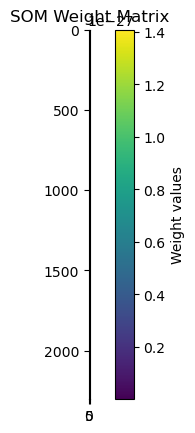

In [7]:
# Train SOM:

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import NoiseSOM as ns
from astropy.table import Table

# Path to your data
path_cats = '/Users/anastasia/Desktop/Desktop/TFM/Minor/SOM_prep/Classic/cats'

# Load your FITS file
data_file = '/Users/anastasia/Desktop/Desktop/TFM/Minor/SOM_prep/Classic/Data_lp_sorted_ilim_Euclid_LSST.fits'

# Read the FITS file using astropy
data = Table.read(data_file)

# List of photometric bands to use for SOM training
bands = ['g', 'r', 'i', 'z', 'y', 'p', 'Y', 'J', 'H', 'K']

# Prepare the fluxes and flux errors arrays
fluxes_d = np.zeros((len(data), len(bands)))
fluxerrs_d = np.zeros((len(data), len(bands)))

# Extract the flux and flux errors for each band
for i, band in enumerate(bands):
    fluxes_d[:, i] = data[band].data  # Extract flux values
    fluxerrs_d[:, i] = data[f'{band}_err'].data  # Extract flux error values

# Scramble the order of the catalog for training purposes
nTrain = fluxes_d.shape[0]
indices = np.random.choice(fluxes_d.shape[0], size=nTrain, replace=False)

# SOM training parameters
hh = ns.hFunc(nTrain, sigma=(30, 1))  # Define the SOM's neighborhood function
metric = ns.AsinhMetric(lnScaleSigma=0.4, lnScaleStep=0.03)  # Define the metric for SOM

# Initialize and train the SOM
som = ns.NoiseSOM(
    metric,
    fluxes_d[indices, :],  # Use the selected flux data for training
    fluxerrs_d[indices, :],  # Use the corresponding flux errors for training
    learning=hh,
    shape=(48, 48),  # SOM grid size (adjust if needed)
    wrap=False,
    logF=True,
    initialize='sample',
    minError=0.02
)

# Save the trained SOM's weight matrix to a file
np.save(f"{path_cats}/som_weights_48_48_Euclid_LSST.npy", som.weights)

# Optionally, you can visualize or inspect the SOM grid after training:
# Check the shape of the weights
print(som.weights.shape)

# If it's a 2D array (48x48 grid), you can plot directly
if len(som.weights.shape) == 2:
    plt.imshow(som.weights, cmap='viridis', interpolation='none')
else:
    # If it's a 3D array (48x48xN), plot the first feature (band u, for example)
    plt.imshow(som.weights[:, :, 0], cmap='viridis', interpolation='none')

# Show the colorbar and title
plt.colorbar(label='Weight values')
plt.title('SOM Weight Matrix')
plt.show()

In [8]:
# Assign SOM:

import numpy as np
import pickle
import matplotlib.pyplot as plt
import NoiseSOM as ns
from astropy.table import Table

# We load the same objects we used for training and we will find the SOM cell for each one, using 
# the SOM we already trained. You could use different objects too, this is just for illustration. 

path_cats = '/Users/anastasia/Desktop/Desktop/TFM/Minor/SOM_prep/Classic/cats'

# Load your FITS file
data_file = '/Users/anastasia/Desktop/Desktop/TFM/Minor/SOM_prep/Classic/Data_lp_sorted_ilim_Euclid_LSST.fits'
# Read the FITS file using astropy
data = Table.read(data_file)

# Bands used in the SOM we already trained
bands = ['g', 'r', 'i', 'z', 'y', 'p', 'Y', 'J', 'H', 'K']
fluxes_d = np.zeros((len(data), len(bands)))
fluxerrs_d = np.zeros((len(data), len(bands)))

# Extract the flux and flux errors for each band
for i, band in enumerate(bands):
    fluxes_d[:, i] = data[band].data  # Extract flux values
    fluxerrs_d[:, i] = data[f'{band}_err'].data  # Extract flux error values

# Train the SOM with this set (takes a few hours on laptop!)
nTrain=fluxes_d.shape[0]

# Now, instead of training the SOM, we load the SOM we trained:
som_weights = np.load("%s/som_weights_48_48_Euclid_LSST.npy"%path_cats,allow_pickle=True)
hh = ns.hFunc(nTrain,sigma=(30,1))
metric = ns.AsinhMetric(lnScaleSigma=0.4,lnScaleStep=0.03)
som = ns.NoiseSOM(metric,None,None, 
    learning=hh, 
    shape=(48,48), 
    wrap=False,logF=True, 
    initialize=som_weights, 
    minError=0.02)
subsamp=1

# Now we classify the objects into cells and save these cells
cells_test,dist_test = som.classify(fluxes_d[::subsamp,:], fluxerrs_d[::subsamp,:])
np.savez("%s/som_deep_48x48_assign_Euclid_LSST.npz"%path_cats,cells=cells_test, dist=dist_test)


classifying 0
classifying 10
classifying 20
classifying 30
classifying 40
classifying 50
classifying 60
classifying 70
classifying 80
classifying 90
classifying 100
classifying 110
classifying 120
classifying 130
classifying 140
classifying 150
classifying 160
classifying 170
classifying 180
classifying 190
classifying 200
classifying 210
classifying 220
classifying 230
classifying 240
classifying 250
classifying 260
classifying 270
classifying 280
classifying 290
classifying 300
classifying 310
classifying 320
classifying 330
classifying 340
classifying 350
classifying 360
classifying 370
classifying 380
classifying 390
classifying 400
classifying 410
classifying 420
classifying 430
classifying 440
classifying 450


/Users/anastasia/Desktop/Desktop/TFM/Minor/NoiseSOM.py:349: RuntimeWarning: overflow encountered in exp
  w = np.minimum(np.exp(2*(vf-4)),1000.)


classifying 460
classifying 470
classifying 480
classifying 490
classifying 500
classifying 510
classifying 520
classifying 530
classifying 540
classifying 550
classifying 560
classifying 570
classifying 580
classifying 590
classifying 600
classifying 610
classifying 620
classifying 630
classifying 640
classifying 650
classifying 660
classifying 670
classifying 680
classifying 690
classifying 700
classifying 710
classifying 720
classifying 730
classifying 740
classifying 750
classifying 760
classifying 770
classifying 780
classifying 790
classifying 800
classifying 810
classifying 820
classifying 830
classifying 840
classifying 850
classifying 860
classifying 870
classifying 880
classifying 890
classifying 900
classifying 910
classifying 920
classifying 930
classifying 940
classifying 950
classifying 960
classifying 970
classifying 980
classifying 990
classifying 1000
classifying 1010
classifying 1020
classifying 1030
classifying 1040
classifying 1050
classifying 1060
classifying 1070


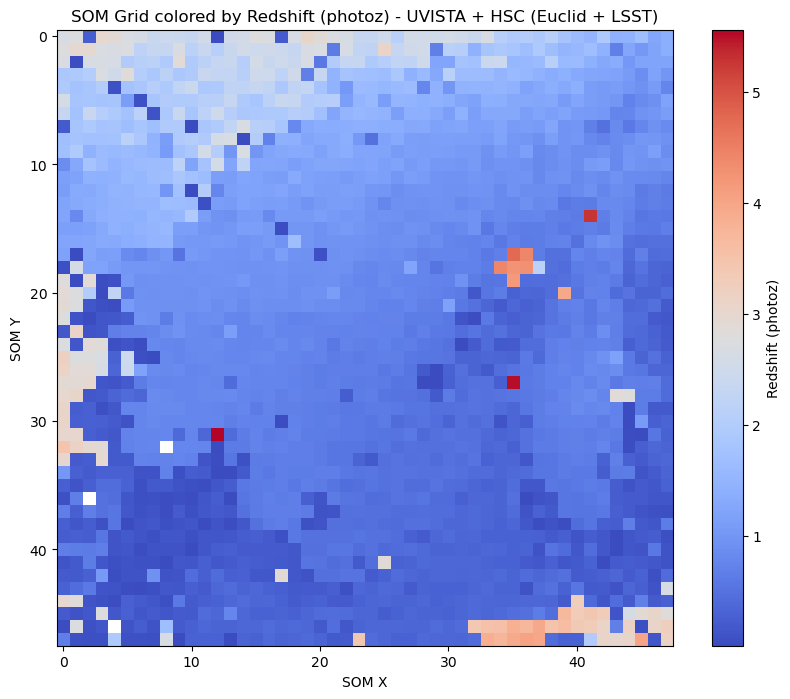

In [9]:
# SOM coloured by redshift

import numpy as np
from astropy.table import Table, Column

# Load the .npz file
data = Table.read(dir_out+ 'Data_lp_sorted_ilim_Euclid_LSST.fits')
som = np.load("%s/som_deep_48x48_assign_Euclid_LSST.npz" % path_cats, allow_pickle=True)

# Extract 'cells' and 'dist'
cells = som['cells']
dist = som['dist']

# Step 1: Check the general shapes of the arrays
# print('Cells shape:', cells.shape)
# print('Dist shape:', dist.shape)

# Make a 'cell' column
new_column = Column(name='SOM_cell', data=cells)
data.add_column(new_column)

som_grid_size = (48, 48)

# print(data.columns)

som_grid = np.full(som_grid_size, np.nan)
photoz = data['photoz']

# Map each data point to its corresponding position in the SOM grid
for idx, cell in enumerate(cells):
    row, col = divmod(cell, som_grid_size[1])  # Convert cell index to row, column
    som_grid[row, col] = photoz[idx]  # Assign the redshift value (photoz) to the grid

# Step 3: Plot the SOM, coloring by redshift
plt.figure(figsize=(10, 8))
plt.imshow(som_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Redshift (photoz)')
plt.title('SOM Grid colored by Redshift (photoz) - UVISTA + HSC (Euclid + LSST)')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')

# Display the plot
plt.show()

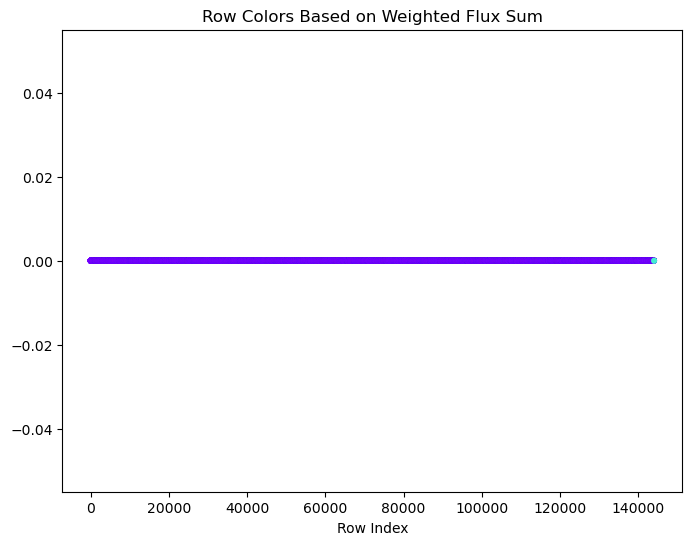

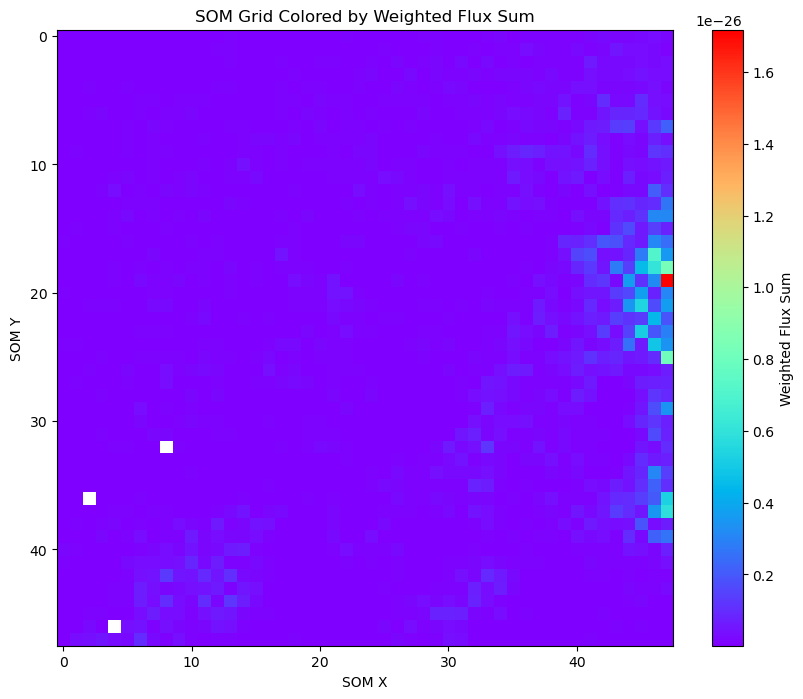

In [16]:
import numpy as np
from astropy.table import Table, Column
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load the .fits file
data = Table.read(dir_out + 'Data_lp_sorted_ilim_Euclid_LSST.fits')

# Step 1: Define the list of band names and weights
bands = ['g', 'r', 'i', 'z', 'y', 'p', 'Y', 'J', 'H', 'K']
weights = np.array([0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.8, 0.8, 0.8, 0.1])  # Define your custom weights for each band

# Step 2: Compute the weighted sum of fluxes
weighted_flux_sum = np.sum([data[band] * weight for band, weight in zip(bands, weights)], axis=0)

# Step 3: Add the weighted sum as a new column in your data
data['weighted_flux_sum'] = weighted_flux_sum

# Step 4: Normalize the weighted sum values (scale them between 0 and 1)
norm = Normalize(vmin=np.min(weighted_flux_sum), vmax=np.max(weighted_flux_sum))

# Step 5: Use a colormap to map the normalized weighted sum to colors
cmap = cm.rainbow  # You can change the colormap here, e.g., 'plasma', 'inferno', etc.
colors = cmap(norm(weighted_flux_sum))  # Apply colormap to the normalized weighted flux values

# Optional: Visualize how these colors would look, by creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(data)), np.zeros(len(data)), c=colors, s=10)
plt.title('Row Colors Based on Weighted Flux Sum')
plt.xlabel('Row Index')
plt.show()

# Step 6: Assign colors to the SOM grid cells based on the 'weighted_flux_sum' column
som = np.load("%s/som_deep_48x48_assign_Euclid_LSST.npz" % path_cats, allow_pickle=True)
cells = som['cells']
som_grid_size = (48, 48)

# Initialize a grid to hold the color values (using NaN for unassigned cells)
som_grid = np.full(som_grid_size, np.nan)

# Map each data point to its corresponding position in the SOM grid
for idx, cell in enumerate(cells):
    row, col = divmod(cell, som_grid_size[1])  # Convert cell index to row, column
    som_grid[row, col] = weighted_flux_sum[idx]  # Assign the weighted flux sum value to the grid

# Step 7: Plot the SOM, coloring by the weighted flux sum
plt.figure(figsize=(10, 8))
plt.imshow(som_grid, cmap='rainbow', interpolation='nearest')  # Use the same colormap
plt.colorbar(label='Weighted Flux Sum')
plt.title('SOM Grid Colored by Weighted Flux Sum')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')

# Display the plot
plt.show()

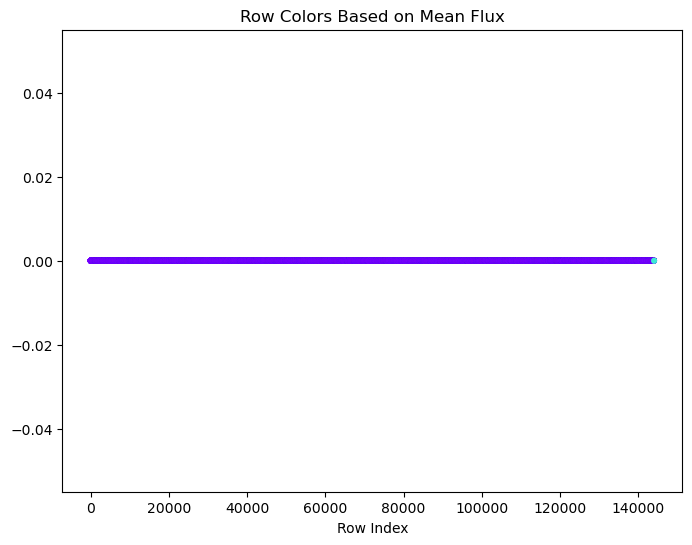

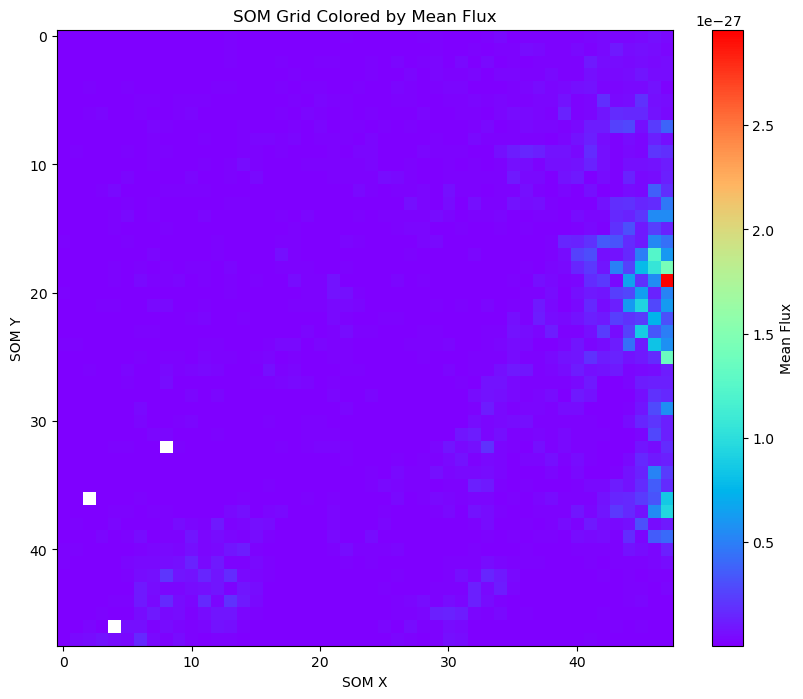

In [13]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load the .fits file
data = Table.read(dir_out + 'Data_lp_sorted_ilim_Euclid_LSST.fits')

# Step 1: Define the list of band names
bands = ['g', 'r', 'i', 'z', 'y', 'p', 'Y', 'J', 'H', 'K']

# Step 2: Compute the mean flux across all bands
mean_flux = np.mean([data[band] for band in bands], axis=0)

# Step 3: Add the mean flux as a new column in your data
data['mean_flux'] = mean_flux

# Step 4: Normalize the mean flux values (scale them between 0 and 1)
norm = Normalize(vmin=np.min(mean_flux), vmax=np.max(mean_flux))

# Step 5: Use a colormap to map the normalized mean flux to colors
cmap = cm.rainbow  # You can change the colormap here, e.g., 'rainbow', 'plasma', etc.
colors = cmap(norm(mean_flux))  # Apply colormap to the normalized mean flux values

# Optional: Visualize how these colors would look, by creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(data)), np.zeros(len(data)), c=colors, s=10)
plt.title('Row Colors Based on Mean Flux')
plt.xlabel('Row Index')
plt.show()

# Step 6: Assign colors to the SOM grid cells based on the 'mean_flux' column
som = np.load("%s/som_deep_48x48_assign_Euclid_LSST.npz" % path_cats, allow_pickle=True)
cells = som['cells']
som_grid_size = (48, 48)

# Initialize a grid to hold the color values (using NaN for unassigned cells)
som_grid = np.full(som_grid_size, np.nan)

# Map each data point to its corresponding position in the SOM grid
for idx, cell in enumerate(cells):
    row, col = divmod(cell, som_grid_size[1])  # Convert cell index to row, column
    som_grid[row, col] = mean_flux[idx]  # Assign the mean flux value to the grid

# Step 7: Plot the SOM, coloring by the mean flux
plt.figure(figsize=(10, 8))
plt.imshow(som_grid, cmap='rainbow', interpolation='nearest')  # Use the same colormap
plt.colorbar(label='Mean Flux')
plt.title('SOM Grid Colored by Mean Flux')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')

# Display the plot
plt.show()